<a href="https://colab.research.google.com/github/njcoburn/A_NEW_KIND_OF_SCIENCE/blob/main/A_NEW_KIND_OF_SCIENCE_SHARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the Rule Number (0-255): 30


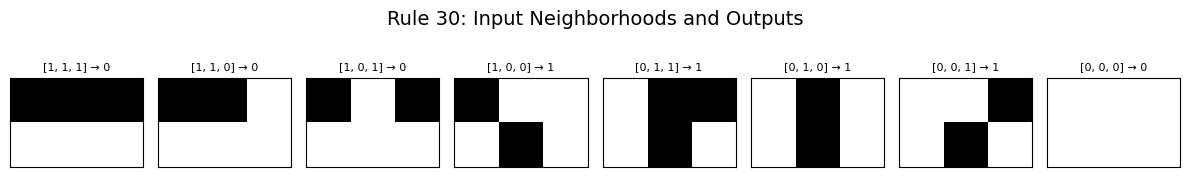

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rule_table(rule_number):
    # Convert rule to binary representation
    binary_rule = f"{rule_number:08b}"#[::-1]  # Reverse to match rule index order

    # Define all 8 possible neighborhoods
    neighborhoods = [
        [1, 1, 1],
        [1, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 1, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
    ]

    fig, ax = plt.subplots(1, 8, figsize=(12, 2))

    for i, neighborhood in enumerate(neighborhoods):
        # Create a grid for the neighborhood and output
        grid = np.zeros((2, 3), dtype=int)
        grid[0] = neighborhood  # Top row is the neighborhood
        grid[1, 1] = int(binary_rule[i])  # Bottom row center is the output

        # Plot each neighborhood and output
        ax[i].imshow(grid, cmap="binary", aspect="equal", interpolation="none")
        ax[i].set_xticks([])  # Remove x-axis ticks
        ax[i].set_yticks([])  # Remove y-axis ticks
        ax[i].set_title(f"{neighborhood} → {binary_rule[i]}", fontsize=8)

    plt.suptitle(f"Rule {rule_number}: Input Neighborhoods and Outputs", fontsize=14)
    plt.tight_layout()
    plt.show()

# Input the rule number and plot the rule table
rule_number = int(input("Enter the Rule Number (0-255): "))
plot_rule_table(rule_number)


In [2]:
rule_number = 30  # Replace with your desired rule number

# Convert rule number to binary representation
binary_rule = f"{rule_number:08b}"#[::-1] ##you need this for python when plotting/arranging because of indexing direction
print(binary_rule)

00011110


Enter the Rule Number (0-255): 30
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]]


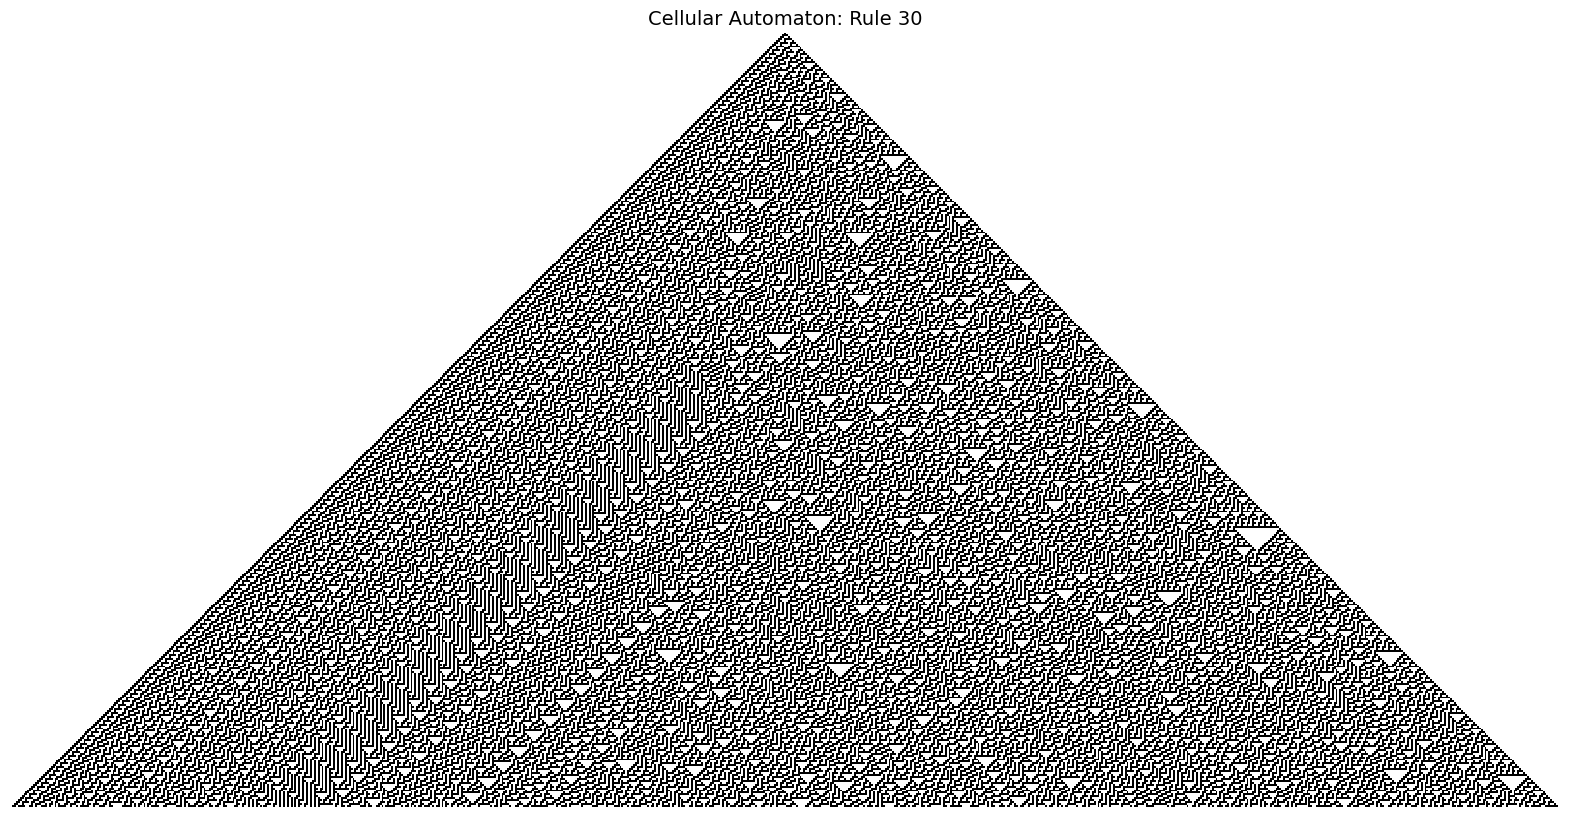

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Convert rule number to binary representation
def get_rule_function(rule_number):
    binary_rule = f"{rule_number:08b}"[::-1]  # Convert to 8-bit binary and reverse
    def rule(state):
        new_state = np.zeros_like(state)
        for i in range(1, len(state) - 1):
            neighborhood = state[i-1:i+2]
            index = 4 * neighborhood[0] + 2 * neighborhood[1] + neighborhood[2]
            new_state[i] = int(binary_rule[index])
        return new_state
    return rule

# Generate the cellular automaton grid
def generate_ca(rule_function, iterations, size):
    grid = np.zeros((iterations, size), dtype=int)
    # Start with a single '1' in the middle
    grid[0, size // 2] = 1
    # Apply the rule to each row
    for i in range(1, iterations):
        grid[i] = rule_function(grid[i - 1])
    return grid

# Plot the results with 1:1 aspect ratio
def plot_ca(grid, rule_number):
    plt.figure(figsize=(20, 20))
    plt.imshow(grid, cmap="binary", interpolation="none", aspect="equal")
    plt.title(f"Cellular Automaton: Rule {rule_number}", fontsize=14)
    plt.axis("off")
    plt.show()

# Main function to run the cellular automaton
def run_cellular_automaton(rule_number, iterations=400, size=801):
    rule_function = get_rule_function(rule_number)
    grid = generate_ca(rule_function, iterations, size)
    print(grid)

    plot_ca(grid, rule_number)

# Input the rule number and run
rule_number = int(input("Enter the Rule Number (0-255): "))
run_cellular_automaton(rule_number)
